# Skeletonizing an image
### Dr. Tirthajyoti Sarkar, Fremont CA 94536

Skeletonization reduces binary objects to 1 pixel wide representations. This can be useful for feature extraction, and/or representing an object’s topology.

In Scikit-image, `skeletonize` function works by making successive passes of the image. On each pass, **border pixels are identified and removed on the condition that they do not break the connectivity of the corresponding object**. The image is correlated with a mask that assigns each pixel a number in the range 0 - 255 corresponding to each possible pattern of its 8 neighbouring pixels. A look up table is then used to assign the pixels a value of 0, 1, 2 or 3, which are selectively removed during the iterations.

In [1]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

### Load and invert the horse image

In [2]:
image = invert(data.horse())

### Perform skeletonization

In [3]:
skeleton = skeletonize(image)

### Display

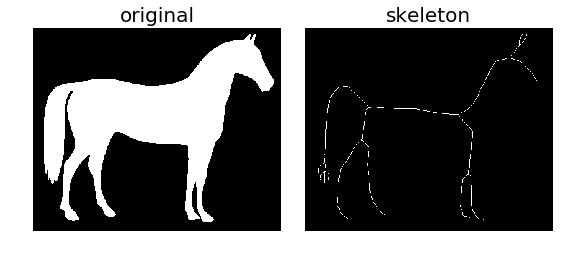

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

### Skeletonize 3D images

Scikit-image function **`skeletonize_3d`** uses an [octree data structure](https://en.wikipedia.org/wiki/Octree) to examine a 3x3x3 neighborhood of a pixel. The algorithm proceeds by iteratively sweeping over the image, and removing pixels at each iteration until the image stops changing. Each iteration consists of two steps: first, a list of candidates for removal is assembled; then pixels from this list are rechecked sequentially, to better preserve connectivity of the image.

In [5]:
from os import getcwd
from skimage.morphology import skeletonize_3d
from skimage.color import rgb2gray 

In [6]:
current_dir = getcwd()
data = plt.imread(current_dir+"\\Images\\torus3d.png")

In [7]:
data = rgb2gray(data)

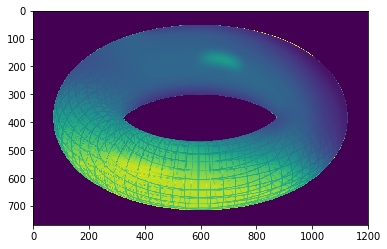

In [8]:
plt.imshow(data)
plt.show()

In [9]:
skeleton3d = skeletonize_3d(data)

c:\users\tirtha\python\anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


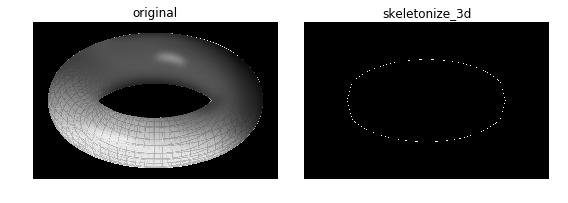

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('skeletonize_3d')
ax[1].axis('off')

fig.tight_layout()
plt.show()